In [1]:
import numpy as np
import sympy
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

In [2]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(15,8)})

In [3]:
#wyliczone przez nas stałe
F = 10.29
tau = 1.11
E0 = 2644
sigma = 34.31

#czas
a, b = 0, 43

# Strategia 1

> biegniemy z maksymalną siłą $F$ do momentu $t_1$: $E(t_1)=0$, później "napędza" nas tylko $\sigma$


* **Wyznaczenie $t_1$**

In [4]:
tau_, F_, v_, E_, t1_, T_, sigma_ = sympy.symbols('tau, F, V, E_0, t_1, T, sigma')

e_expr = E_ + sigma_*t1_-F_**2*tau_*t1_ - F_**2*tau_*sympy.exp(-t1_/tau_) + F_**2*tau_**2
tc_expr = sympy.solve(e_expr, t1_)[0]
tc_expr

(E_0 + F**2*tau**2 + tau*(F**2*tau - sigma)*LambertW(-exp((-E_0 + F**2*tau**2*log(F**2*tau) - F**2*tau**2 - sigma*tau*log(F**2*tau))/(tau*(F**2*tau - sigma)))/(tau*(F**2*tau - sigma))))/(F**2*tau - sigma)

In [5]:
tc = float(tc_expr.evalf(subs={F_: F, E_: E0, sigma_: sigma, tau_: tau}))
tc

33.3383172259483

* **Wykres prędkości**

In [6]:
def velocity_1(t, t1=tc, F=F, tau=tau, s=sigma):
    if t <= t1:
        return F*tau*(1-np.exp(-t/tau))
    else:
        return (s*tau + ((F*tau*(1-np.exp(-t1/tau)))**2-s*tau)*np.exp(-2*(t-t1)/tau))**(1/2)

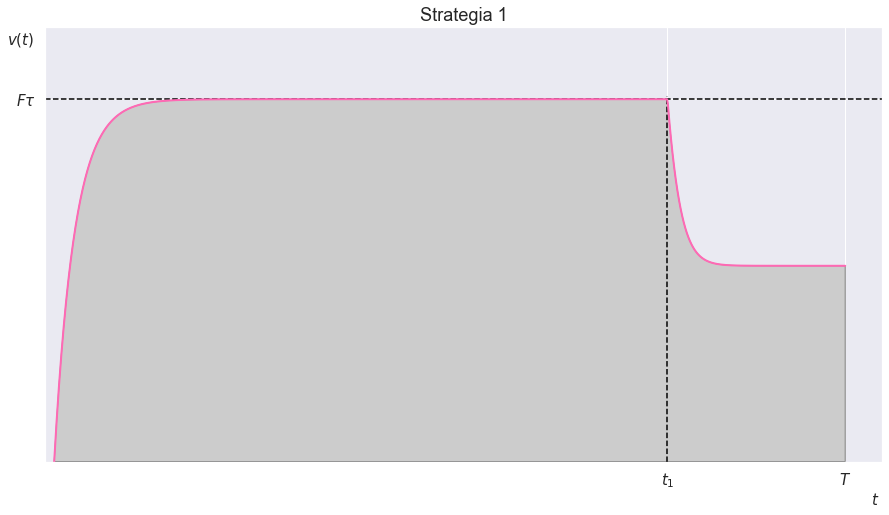

In [7]:
xi = np.linspace(a, b, 10**3)
yi = [velocity_1(t) for t in xi]


fig, ax = plt.subplots()
ax.axhline(y=F*tau, color='black', linestyle='--')
ax.axvline(x=tc, ymax=0.84, color='black', linestyle='--')

ax.plot(xi, yi, color='hotpink', linewidth=2)

verts = [(a, 0), *zip(xi, yi), (b, 0)]
poly = Polygon(verts, facecolor='0.8', edgecolor='0.5')
ax.add_patch(poly)

fig.text(0.89, 0.05, '$t$', size=15)
fig.text(0.09, 0.85, '$v(t)$', size=15)

ax.set_xticks([tc, b])
ax.set_xticklabels(['$t_1$', '$T$'], size=15)
ax.set_yticks([F*tau])
ax.set_yticklabels(['$F \\tau$'], size=15)

ax.set_ylim([a, 1.2*F*tau])
ax.set_xlim([a-0.5,b+2])

ax.set_title('Strategia 1', size=18)

#plt.savefig('startegia1')
plt.show()

* **Wyliczenie D**

In [8]:
np.trapz(yi, xi) 

431.13110160687086

----

# Strategia 2

> biegniemy tak, aby $E(T) = 0$



*  **Wyznaczenie $t_1$**

In [9]:
#szukamy takiego v, żeby T = b
v = 0.91*F*tau
T = (tau_*(E_ + F_*tau_*v_ + (F_**2*tau_**2-v_**2)*sympy.log(1-v_/(F_*tau_))))/(v_**2 - sigma_*tau_)
T = T.evalf(subs={F_: F, E_: E0, sigma_: sigma, tau_: tau, v_: v})
T

42.9834352660547

In [10]:
tc2 = tau*np.log(F*tau/(F*tau - v))
tc2

2.6728196256035774

* **Wykres prędkości**

In [11]:
def velocity_2(t, t1=tc2, F=F, tau=tau, s=sigma):
    if t <= t1:
        return F*tau*(1-np.exp(-t/tau))
    else:
        return F*tau*(1-np.exp(-t1/tau))

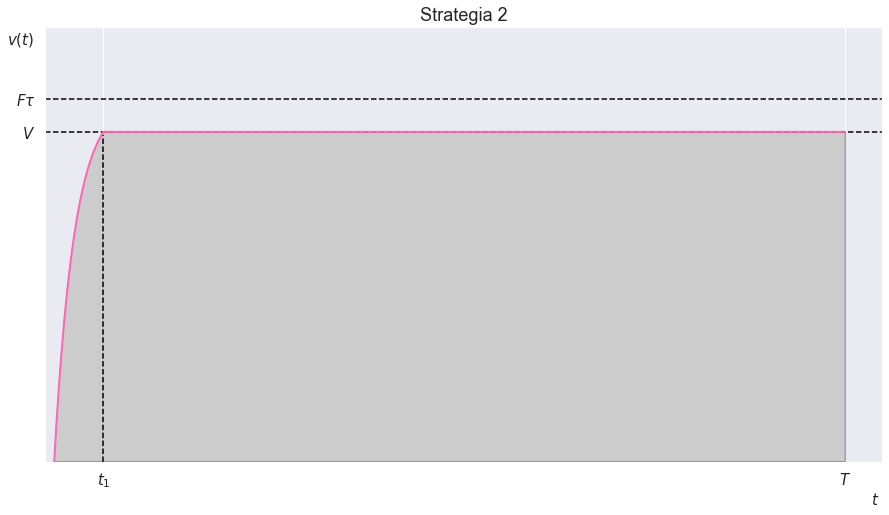

In [12]:
xi2 = np.linspace(a, b, 10**3)
yi2 = [velocity_2(t) for t in xi2]


fig, ax = plt.subplots()
ax.axhline(y=F*tau, color='black', linestyle='--')
ax.axvline(x=tc2, ymax=0.75, color='black', linestyle='--')
ax.axhline(y=v, color='black', linestyle='--')

ax.plot(xi2, yi2, color='hotpink', linewidth=2)

verts = [(a, 0), *zip(xi2, yi2), (b, 0)]
poly = Polygon(verts, facecolor='0.8', edgecolor='0.5')
ax.add_patch(poly)

fig.text(0.89, 0.05, '$t$', size=15)
fig.text(0.09, 0.85, '$v(t)$', size=15)

ax.set_xticks([tc2, b])
ax.set_xticklabels(['$t_1$', '$T$'], size=15)
ax.set_yticks([F*tau, v])
ax.set_yticklabels(['$F \\tau$', '$V$'], size=15)

ax.set_ylim([a, 1.2*F*tau])
ax.set_xlim([a-0.5,b+2])

ax.set_title('Strategia 2', size=18)

#plt.savefig('startegia2')
plt.show()

* **Wyliczenie D**

In [13]:
np.trapz(yi2, xi2)

438.14774683493056